<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

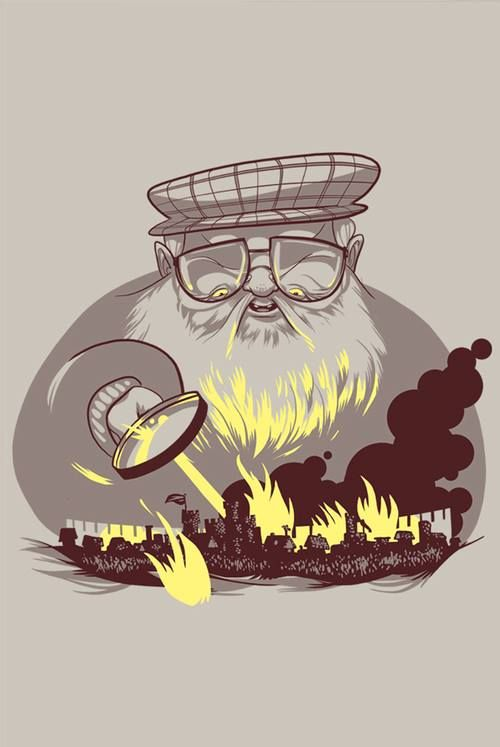

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v 


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.gaussian_process.kernels import Matern

In [3]:
pd.set_option('display.max_rows', None)

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [4]:
read_data_train = pd.read_csv('game_of_thrones_train.csv')
read_data_test = pd.read_csv('game_of_thrones_test.csv')
data_train = read_data_train.set_index('S.No')
data_test = read_data_test.set_index('S.No')

In [5]:
data_train.columns

Index(['name', 'title', 'male', 'culture', 'dateOfBirth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity',
       'isAlive'],
      dtype='object')

In [6]:
data_train.isna().sum(axis = 0)

name                   0
title                840
male                   0
culture             1069
dateOfBirth         1278
mother              1539
father              1535
heir                1536
house                381
spouse              1357
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isAliveMother       1539
isAliveFather       1535
isAliveHeir         1536
isAliveSpouse       1357
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
dtype: int64

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [7]:
#drop

data_train.drop('spouse', axis = 1, inplace = True)
data_test.drop('spouse', axis = 1, inplace = True)
data_train.drop(columns = 'name', inplace=True)
data_test.drop(columns = 'name', inplace=True)
data_train.drop(columns = 'mother', inplace=True)
data_test.drop(columns = 'mother', inplace=True)
data_train.drop(columns = 'father', inplace=True)
data_test.drop(columns = 'father', inplace=True)
# data_train.drop(columns = 'heir', inplace=True)
# data_test.drop(columns = 'heir', inplace=True)
data_train.drop(columns = 'isAliveSpouse', inplace = True)
data_test.drop(columns = 'isAliveSpouse', inplace = True)

In [8]:
data_train.head()

,title,male,culture,dateOfBirth,heir,house,book1,book2,book3,book4,book5,isAliveMother,isAliveFather,isAliveHeir,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,0,0,NaN,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,208.0,NaN,House Frey,1,1,1,1,1,NaN,NaN,NaN,1,1,97.0,1,0.896321,1
3,Ser,1,NaN,NaN,NaN,House Swyft,0,0,0,1,0,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Queen,0,NaN,82.0,NaN,House Arryn,0,0,0,0,0,NaN,NaN,NaN,1,1,23.0,0,0.183946,0
5,Greenstone,0,Dornish,276.0,NaN,House Santagar,0,0,0,1,0,NaN,NaN,NaN,1,1,29.0,0,0.043478,1


In [9]:
# median = np.quantile(np.concatenate((data_train['dateOfBirth'].dropna(), data_test['dateOfBirth'].dropna()), axis = 0), q = 0.5)
median = np.quantile(data_train['dateOfBirth'].dropna(), q = 0.5)
mode = data_train['dateOfBirth'].dropna().mode()
mean = np.mean(data_train['dateOfBirth'].dropna())
mode = float(mode.iloc[0])
max_value = np.max(data_train['dateOfBirth'])
plot_age = data_train['dateOfBirth'].dropna()

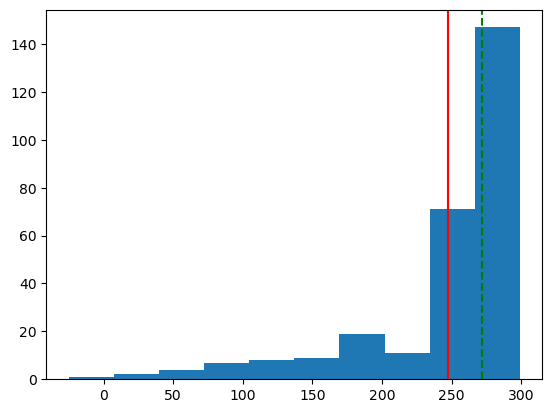

In [10]:
plt.hist(plot_age)
plt.axvline(x=mean, color='r', linestyle = '-', label='mean')
plt.axvline(x=median, color='g', linestyle = '--', label='median')

median = np.quantile(data_train['dateOfBirth'].dropna(), q = 0.5)
mode = data_train['dateOfBirth'].dropna().mode()
mean = np.mean(data_train['age'].dropna())
mode = float(mode.iloc[0])
plot_birth = data_train['age'].dropna()

In [11]:
#fillna
changing_nan_columns = {'culture':'UNKNOWN', 'house':'UNKNOWN', 'isAliveMother': 0, 'isAliveFather': 0, 'isAliveHeir': 0, 'title':'UNKNOWN', 'spouse':'single', 'dateOfBirth':median}
changing_int_columns = {'isAliveMother': {0:1}, 'isAliveFather': {0:1}, 'isAliveHeir': {0:1}}

data_train = data_train.replace(changing_int_columns)
data_test = data_test.replace(changing_int_columns)
data_train = data_train.fillna(changing_nan_columns)
data_test = data_test.fillna(changing_nan_columns)

In [12]:
median = np.quantile(data_train['age'].dropna(), q = 0.5)
mode = data_train['age'].dropna().mode()
mean = np.mean(data_train['age'].dropna())
mode = float(mode.iloc[0])
plot_age = data_train['age'].dropna()

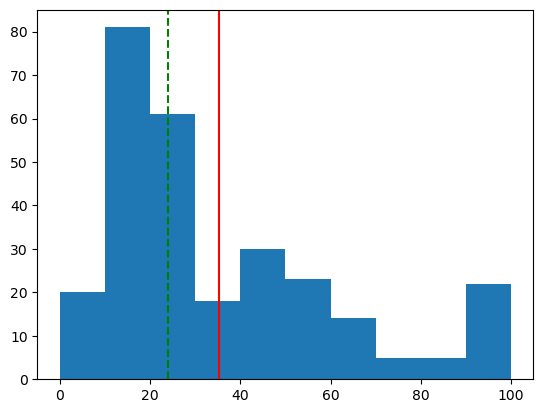

In [13]:
plt.hist(plot_age)
plt.axvline(x=mean, color='r', linestyle = '-', label='mean')
plt.axvline(x=median, color='g', linestyle = '--', label='median')

In [14]:
data_train = data_train.fillna({'age':median})
# data_train.loc[data_train['age'] <= 0, 'age'] = median
data_test = data_test.fillna({'age':median})
# data_test.loc[data_test['age'] <= 0, 'age'] = median

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [15]:
data_train['isPopular'] = np.where(data_train['popularity'] > 0.2, 1, 0)
data_test['isPopular'] = np.where(data_test['popularity'] > 0.2, 1, 0)
data_train = data_train.drop('popularity', axis = 1)
data_test = data_test.drop('popularity', axis = 1)

In [16]:
data_train['boolDeadRelations'] = np.where(data_train['numDeadRelations'] > 0, 1, 0)
data_test['boolDeadRelations'] = np.where(data_test['numDeadRelations'] > 0, 1, 0)
data_train = data_train.drop('numDeadRelations', axis = 1)
data_test = data_test.drop('numDeadRelations', axis = 1)
print()

In [17]:
cult = {
    'Summer Islands': ['Summer islands', 'Summer islander', 'Summer isles'],
    'Ghiscari': ['Ghiscari', 'Ghiscaricari',  'Ghis'],
    'Asshai': ["Asshai'i", 'Asshai'],
    'Lysene': ['Lysene', 'Lyseni'],
    'Andal': ['Andal', 'Andals'],
    'Braavosi': ['Braavosi', 'Braavos'],
    'Dornish': ['Dornishmen', 'Dorne', 'Dornish'],
    'Myrish': ['Myr', 'Myrish', 'Myrmen'],
    'Westermen': ['Westermen', 'Westerman', 'Westerlands', 'Westerman', 'wester', 'westermen'],
    'Westerosi': ['Westeros', 'Westerosi'],
    'Stormlander': ['Stormlands', 'Stormlander'],
    'Norvoshi': ['Norvos', 'Norvoshi'],
    'Northmen': ['The north', 'Northmen', 'Northern mountain clans'],
    'Free Folk': ['Wildling', 'First men', 'Free folk'],
    'Qartheen': ['Qartheen', 'Qarth'],
    'Reach': ['The reach', 'Reach', 'Reachmen'],
    'Northmen':['northmen', 'Northmen'],
    'Ironborn':['ironborn', 'Ironborn', 'Ironmen'],
    'Valemen':['Valemen', 'Vale mountain clans']
}
rev_cult = {}

for key, values in cult.items():
    for value in values:
        rev_cult[value] = key


data_train = data_train.replace({'culture':rev_cult})
data_test = data_test.replace({'culture':rev_cult})    

data_train['culture'] = np.where(data_train['culture'].map(data_train['culture'].value_counts()) < 2, 'Rare_cult', data_train['culture'])
data_test['culture'] = np.where(data_test['culture'].map(data_test['culture'].value_counts()) < 2, 'Rare_cult', data_test['culture'])

# data_train = data_train.replace({'culture':rev_cult})
# data_test = data_test.replace({'culture':rev_cult})    
# data_train['house'] = np.where(data_train['house'].map(data_train['house'].value_counts()) < 3, 'Rare_house', data_train['house'])
# data_test['house'] = np.where(data_test['house'].map(data_test['house'].value_counts()) < 3, 'Rare_house', data_test['house'])

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

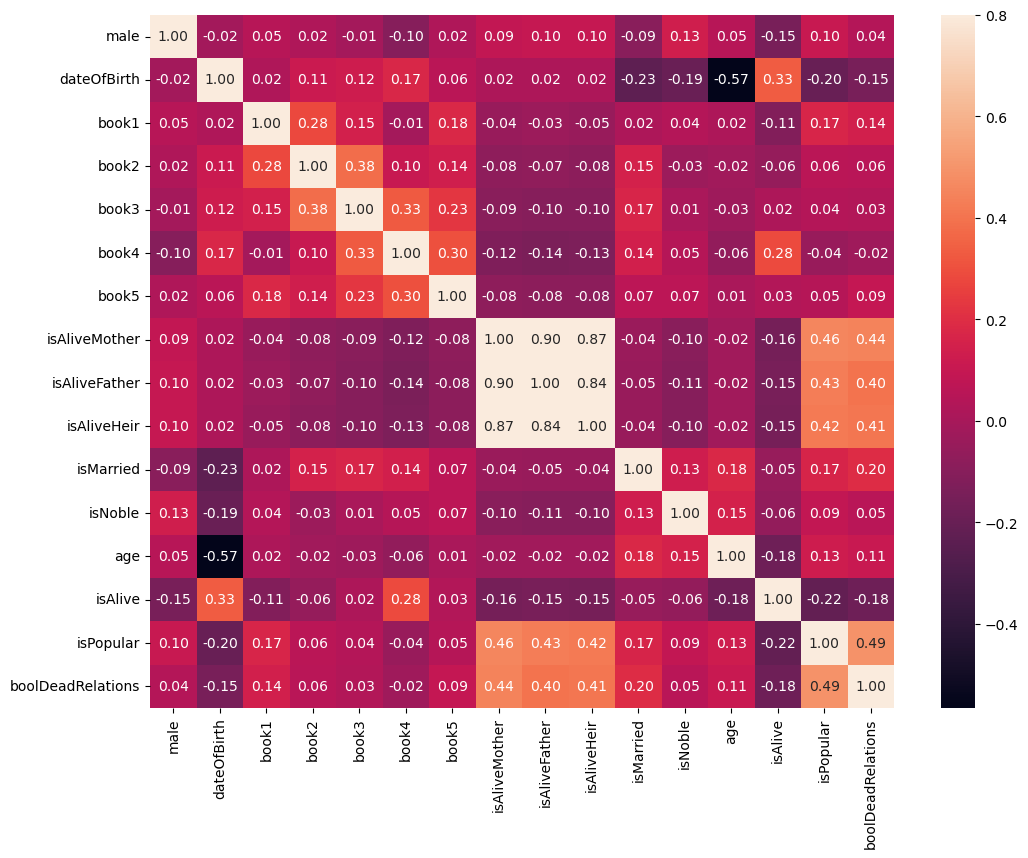

In [18]:
corrmat = data_train[data_train.select_dtypes(include = ['float', 'int']).columns.tolist()].corr()
f, ax = plt.subplots(figsize=(12, 9))
snb.heatmap(corrmat, vmax=0.8, annot=True, fmt=".2f");

In [19]:
# from sklearn.preprocessing import StandardScaler
# scaler

In [20]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=1)
# data_train['pca_books'] = pca.fit_transform(data_train[['book2', 'book3', 'book5']])
# data_test['pca_books'] = pca.transform(data_test[['book2', 'book3', 'book5']])

In [21]:
# data_train['AliveRelatives'] = data_train[['isAliveHeir',  'isAliveMother', 'isAliveFather']].any(axis=1).astype(int)
# data_test['AliveRelatives'] = data_test[['isAliveHeir', 'isAliveMother', 'isAliveFather']].any(axis=1).astype(int)

data_train['AliveRelatives'] = data_train[['isAliveHeir',  'isAliveMother', 'isAliveFather', 'isMarried']].sum(axis=1).astype(int)
data_test['AliveRelatives'] = data_test[['isAliveHeir', 'isAliveMother', 'isAliveFather', 'isMarried']].sum(axis=1).astype(int)
# data_train['AliveParents'] = data_train[['isAliveMother', 'isAliveFather']].sum(axis=1).astype(int)
# data_test['AliveParents'] = data_test[['isAliveMother', 'isAliveFather']].sum(axis=1).astype(int)

# data_train['new'] = data_train[['isMarried', 'isAliveHeir']].sum(axis=1).astype(int)
# data_test['new'] = data_test[['isMarried', 'isAliveHeir']].sum(axis=1).astype(int)

# data_train['new2'] = data_train[['isMarried', 'isNoble']].all(axis=1).astype(int)
# data_test['new2'] = data_test[['isMarried', 'isNoble']].all(axis=1).astype(int)

data_train['booksAppearance'] = data_train[['book1', 'book2', 'book3', 'book4', 'book5']].all(axis=1).astype(int)
data_test['booksAppearance'] = data_test[['book1', 'book2', 'book3', 'book4', 'book5']].all(axis=1).astype(int)
# data_train['booksAppearance'] = data_train[['book1','book2', 'book3']].any(axis=1).astype(int)
# data_test['booksAppearance'] = data_test[['book1', 'book2', 'book3']].any(axis=1).astype(int)

In [22]:
data_train.drop(columns=['isAliveHeir',  'isAliveMother', 'isAliveFather', 'book3'], inplace = True)
data_test.drop(columns = ['isAliveHeir', 'isAliveMother', 'isAliveFather', 'book3'], inplace = True)
# # data_train.drop(columns=['isMarried'], inplace = True)
# data_test.drop(columns = ['isMarried'], inplace = True)
# data_train.drop(columns = ['book1', 'book2', 'book3'], inplace = True)
# data_test.drop(columns = ['book1', 'book2', 'book3'], inplace = True)

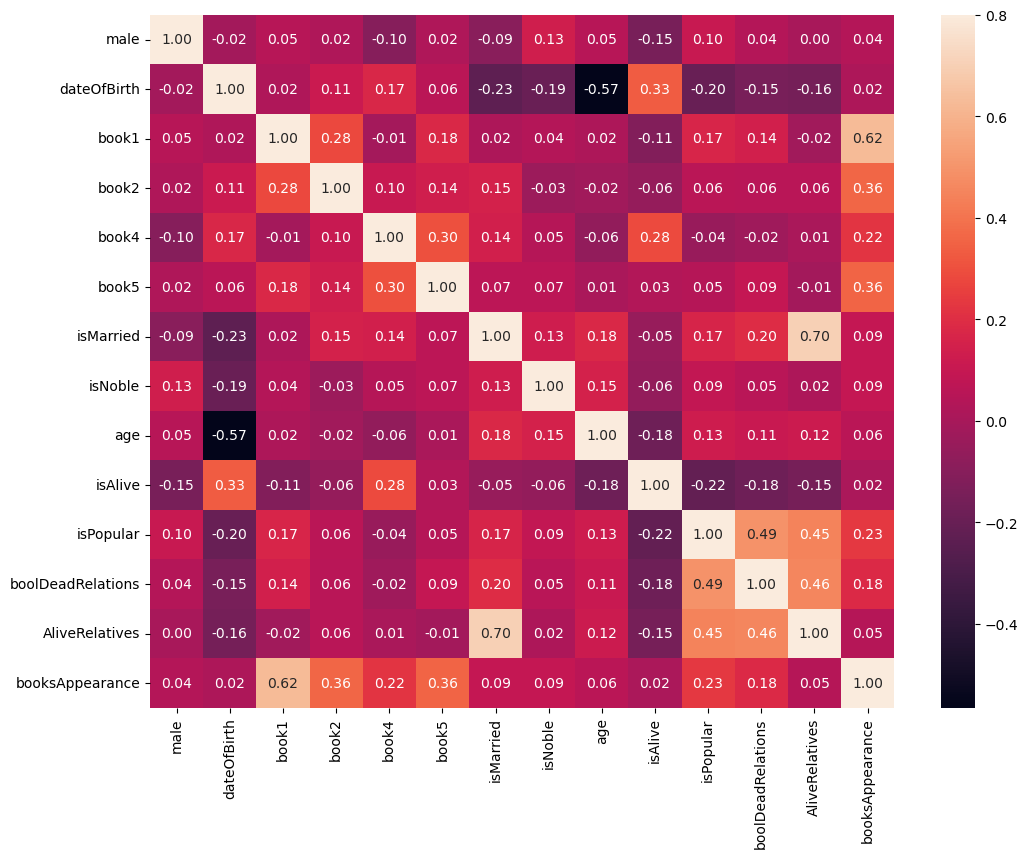

In [23]:
corrmat = data_train[data_train.select_dtypes(include = ['float', 'int']).columns.tolist()].corr()
f, ax = plt.subplots(figsize=(12, 9))
snb.heatmap(corrmat, vmax=0.8, annot=True, fmt=".2f");

In [24]:
# data_train["title"] = np.where(data_train['title'].map(data_train['title'].value_counts()) < 4, "Rare_tit", data_train['title'])
# data_test['title'] = np.where(data_test['title'].map(data_test['title'].value_counts()) < 4, 'Rare_tit', data_test['title'])
# data_train['house'] = np.where(data_train['house'].map(data_train['house'].value_counts()) < 2, 'Rare_house', data_train['house'])
# data_test['house'] = np.where(data_test['house'].map(data_test['house'].value_counts()) < 2, 'Rare_house', data_test['house'])


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

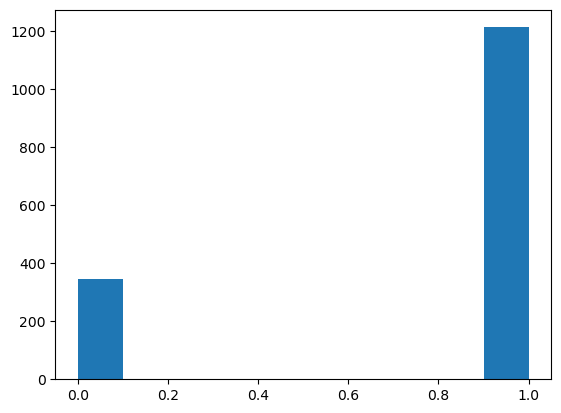

In [25]:
plt.hist(data_train['isAlive'])
plt.show()

In [26]:
#disbalance is obvious, so we will use oversampling to fix this

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [27]:
cat_columns = data_train.select_dtypes(include = 'object').columns.tolist()

In [28]:
data_train_reset = data_train.reset_index(drop=True)
data_test_reset = data_test.reset_index(drop=True)

combined_data = pd.concat([data_train_reset[cat_columns], data_test_reset[cat_columns]], axis=0)
encoded_data = pd.get_dummies(combined_data, prefix=cat_columns, dtype=float, drop_first=True)
data_train_encoded = encoded_data.iloc[:len(data_train)].reset_index(drop=True)
data_train_encoded.fillna(0, inplace=True)
data_train = pd.concat([data_train_encoded, data_train_reset.drop(cat_columns, axis=1)], axis=1)
data_test_encoded = encoded_data.iloc[len(data_train):].reset_index(drop=True)
data_test_encoded.fillna(0, inplace=True)
data_test = pd.concat([data_test_encoded, data_test_reset.drop(cat_columns, axis=1)], axis=1)

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

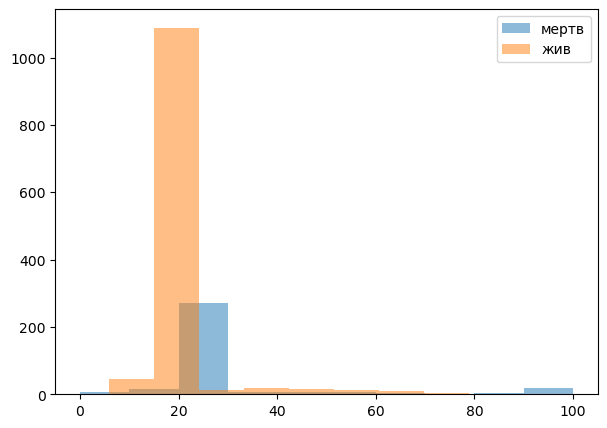

In [29]:
plt.figure(figsize=(7, 5))

plt.hist(data_train['age'][data_train['isAlive'] == 0], alpha=0.5, label='мертв')
plt.hist(data_train['age'][data_train['isAlive'] == 1], alpha=0.5, label='жив')

plt.legend()
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [30]:
X = data_train.drop(columns = 'isAlive')
y = data_train['isAlive']

In [31]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
X_resampled, y_resampled = X_resampled.to_numpy(), y_resampled.to_numpy()
# rus = RandomUnderSampler(random_state = 42)
# X_resampled, y_resampled = rus.fit_resample(X, y)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=data_train.shape[1]-1)
X_test = data_test.to_numpy()
all_data = np.concatenate((X_resampled, X_test), axis = 0)
pca.fit(all_data)
X_resampled = pca.transform(X_resampled)

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.05, random_state=42)

In [35]:
y_test.shape

(122,)

In [36]:
data_train.shape

(1557, 675)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [37]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [38]:
# from ... import AdaBoostClassifier, RandomForestClassifier
# from ... import GaussianProcessClassifier
# from ... import GaussianNB
# from ... import KNeighborsClassifier
# from ... import SVC
# from ... import DecisionTreeClassifier

In [39]:
# # print(data_train.isna().sum(axis = 0))
# data_test.isna().sum(axis = 0)

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [40]:
logistic_regression = LogisticRegression(C=1)
logistic_regression.fit(X_train, y_train)

C:\Users\pasha\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [41]:
ans = RandomForestClassifier(n_estimators=200, max_depth = 500)
ans.fit(X_train, y_train)

RandomForestClassifier(max_depth=500, n_estimators=200)

In [42]:
boosting = AdaBoostClassifier(algorithm='SAMME')
boosting.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME')

In [43]:
g = GaussianProcessClassifier()
g.fit(X_resampled, y_resampled)

GaussianProcessClassifier()

In [44]:
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [45]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [46]:
v = SVC()
v.fit(X_train, y_train)

SVC()

In [47]:
bin = DecisionTreeClassifier(max_depth = 10000)
bin.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10000)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [48]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [49]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7295


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [50]:
# # Шаг 1. создание модели
# # ans = RandomForestClassifier(n_estimators=100, max_depth = 200)
# ans = RandomForestClassifier(n_estimators = 200, max_depth = 15)
# # Шаг 2. обучение модели
# for i in range(10):
#     ans.fit(X_train, y_train)

# # Шаг 3. Предсказание на тестовых данных
# ans_y = ans.predict(X_test)


# # Шаг 3. Предсказание на тестовых данных
# ans_y = ans.predict(X_test)

# # Шаг 4. Оценка предсказания по метрике accuracy
# accuracy = accuracy_score(y_test, ans_y)

# print("Accuracy : %.4f" % accuracy)

In [51]:
# Шаг 3. Предсказание на тестовых данных
y_pred = boosting.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.7377


In [52]:
y_pred = g.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9262


In [53]:
y_pred = naive.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.6639


In [54]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8361


In [55]:
y_pred = v.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.5984


In [56]:
y_pred = bin.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8852


Выберите лучшую модель.

In [57]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [58]:
X_test = data_test.to_numpy()
# X_test = pca.transform(X_test)
final_ans = g.predict(X_test)
submission = pd.read_csv("submission.csv", index_col='S.No')
submission['isAlive'] = final_ans
submission.to_csv('submission.csv')